# Pymaceuticals Inc.
---

### Analysis

- After merging the two csv files, there were a total of 249 mice under the Mouse ID column. However, there was one duplicate with the “Mouse ID” of “g989”. This duplicate was removed and there remained a total of 248 mice under the “Mouse ID” column. The data frame with 248 mice was used as the main data source for the remaining analyses performed. 

- The data demonstrated that the drug regimens Capomulin and Ramicane exhibited lower mean, median, and variance tumor volumes compared to the rest of the drug regimens. Ketapril and Naftisol exhibited the highest mean, median, and variance tumor volumes compared to the rest of the drug regimens. 

- The total number of rows for “Mouse ID/Timepoints” were counted for each drug regimen. Capomulin and Ramicane were the most used drug regimens in the study with a total of 230 and 228 mice respectively. The distribution of female vs male mice showed that there was a total of 51% male mice and 49% female mice used in the study. 

- Mice treated with Capomulin exhibited a large decrease in tumor volume, with the largest decrease in volume appearing from days 25 to 35. However, from days 35 to 45, the tumor volume increased slightly.  
- When comparing mouse weight to average observed tumor volume for mice under the Capomulin drug regimen, a positive correlation was exhibited. The data exhibited a correlation coefficient of 0.83, thus demonstrating a statistically significant relationship between average observed tumor volume and the weight of mice. 


In [394]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_metadata_complete = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_metadata_complete.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [395]:
# Checking the number of mice.
mouse_count = len(mouse_metadata_complete["Mouse ID"].unique())
mouse_count

249

In [396]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mouse_metadata_complete.loc[mouse_metadata_complete.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()

In [397]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate_mouse_id = pd.DataFrame(duplicate_mice)
all_duplicate_mouse_id

,0
0,g989


In [398]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = mouse_metadata_complete.drop(mouse_metadata_complete[mouse_metadata_complete["Mouse ID"].isin(duplicate_mice)].index)
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [399]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_count = len(clean_df["Mouse ID"].unique())
clean_mouse_count

248

## Summary Statistics

In [400]:
# Create GroupBy object based upon "Drug Regimen" column:
groupby_drug_regimen = clean_df.groupby(["Drug Regimen"])

# Calculate mean, median, variance, standard deviation, and sem of the tumor volume for each drug: 
volume_mean = groupby_drug_regimen["Tumor Volume (mm3)"].mean()
volume_median = groupby_drug_regimen["Tumor Volume (mm3)"].median()
volume_variance = groupby_drug_regimen["Tumor Volume (mm3)"].var()
volume_std_deviation = groupby_drug_regimen["Tumor Volume (mm3)"].std()
volume_sem = groupby_drug_regimen["Tumor Volume (mm3)"].sem()


# Summary statistics data frame for change in tumor volume for each drug:
drug_regimen_summary = pd.DataFrame({"Tumor Volume Mean": volume_mean,
                                     "Tumor Volume Median": volume_median,
                                     "Tumor Volume Variance": volume_variance,
                                     "Tumor Volume Standard Deviation": volume_std_deviation,
                                     "Tumor Volume SEM": volume_sem})

drug_regimen_summary


,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [401]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
aggregate_summary = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])

aggregate_summary

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [402]:
# Count and sort the total number of rows(Mouse ID/Timepoints) for each drug regimen in descending order 
regimens_df = pd.DataFrame(clean_df.groupby("Drug Regimen")["Mouse ID"].count().sort_values(ascending=False))
regimens_df

,Mouse ID
Drug Regimen,
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Placebo,181
Stelasyn,181
Ceftamin,178
Infubinol,178


<Axes: title={'center': 'Number of Rows for Each Drug Regimen'}, xlabel='Drug Regimen'>

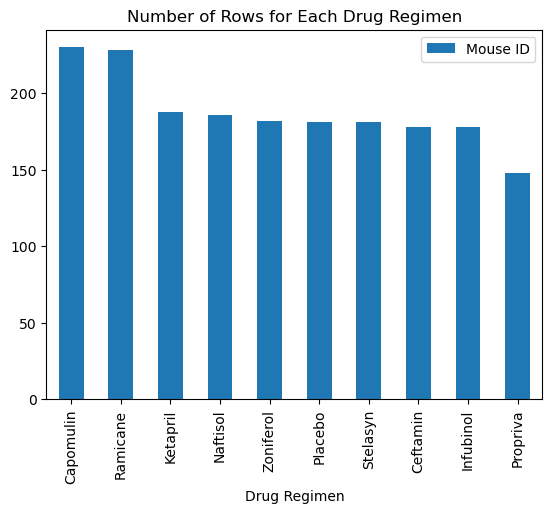

In [403]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas
pandas_bar = regimens_df.plot(kind="bar", y="Mouse ID", align="center")

# Add title
pandas_bar.set_title("Number of Rows for Each Drug Regimen")

# Show the plot
pandas_bar

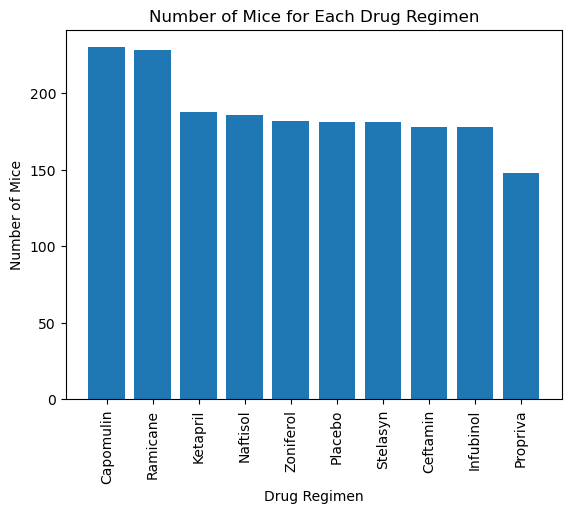

In [404]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Group by 'Drug Regimen' and count the number of rows for each group
drug_regimen = regimens_df.groupby("Drug Regimen").size()

# Create a bar plot
pyplot_bar = plt.bar(x=regimens_df.index, height=regimens)

# Adding labels and title
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Number of Mice for Each Drug Regimen")

# Rotating the Y axis labels vertically 
plt.xticks(rotation="vertical")

# Display the plot
plt.show()

In [405]:
# Generate a Dataframe showing the distribution of female versus male mice using Pandas 
sex_df = pd.DataFrame(clean_df["Sex"].value_counts())
sex_df

,count
Sex,
Male,958
Female,922


<Axes: title={'center': 'Distribution of Female vs Male Mice'}, ylabel='Sex'>

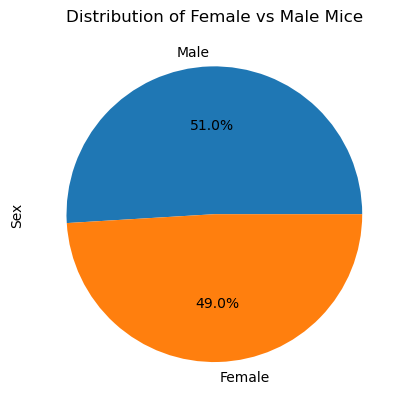

In [406]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Assuming 'regimens_df' is your DataFrame with 'Drug Regimen' as the index and 'Mouse ID' as the values
# If you don't have a DataFrame, you can convert your Series to a DataFrame
pandas_pie = sex_df["count"].plot.pie(autopct="%1.1f%%")

# Adding labels and title
pandas_pie.set_title("Distribution of Female vs Male Mice")
pandas_pie.set_ylabel("Sex")

# Display the plot
pandas_pie

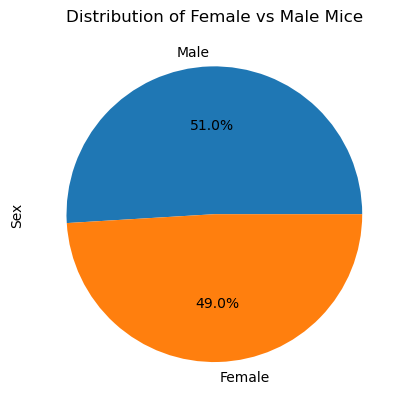

In [407]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pyplot_pie = plt.pie(x=sex_df["count"], labels=sex_df.index, autopct="%1.1f%%")

# Adding labels and title
plt.title("Distribution of Female vs Male Mice")
plt.ylabel("Sex")

# Display the plot
plt.show()

## Quartiles, Outliers and Boxplots

In [408]:
# Calculate the final tumor volume of each mouse across the treatment regimen: Capomulin
capomulin_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]

# Reset index of the DataFrame
capomulin_df = capomulin_df.reset_index()

# Start by getting the last (greatest) timepoint for each mouse
capomulin_last = capomulin_df.groupby("Mouse ID").max()["Timepoint"]
capomulin_vol = pd.DataFrame(capomulin_last)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
capomulin_merge = pd.merge(capomulin_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")
capomulin_merge

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2
5,i557,45,Capomulin,Female,1,24,47.685963,1
6,i738,45,Capomulin,Female,23,20,37.311846,2
7,j119,45,Capomulin,Female,7,23,38.125164,1
8,j246,35,Capomulin,Female,21,21,38.753265,1
9,l509,45,Capomulin,Male,17,21,41.483008,3


In [409]:
# Calculate the final tumor volume of each mouse across the treatment regimen: Ramicane 
ramicane_df = clean_df.loc[clean_df["Drug Regimen"] == "Ramicane"]

# Reset index of the DataFrame
ramicane_df = ramicane_df.reset_index()

# Start by getting the last (greatest) timepoint for each mouse
ramicane_last = ramicane_df.groupby("Mouse ID").max()["Timepoint"]
ramicane_vol = pd.DataFrame(ramicane_last)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
ramicane_merge = pd.merge(ramicane_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")
ramicane_merge

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2
5,c758,45,Ramicane,Male,9,17,33.397653,1
6,d251,45,Ramicane,Female,8,19,37.311236,2
7,e662,45,Ramicane,Male,8,24,40.659006,2
8,g791,45,Ramicane,Male,11,16,29.128472,1
9,i177,45,Ramicane,Male,10,18,33.562402,3


In [410]:
# Calculate the final tumor volume of each mouse across the treatment regimen: Infubinol
infubinol_df = clean_df.loc[clean_df["Drug Regimen"] == "Infubinol"]

# Reset index of the DataFrame
infubinol_df = infubinol_df.reset_index()

# Start by getting the last (greatest) timepoint for each mouse
infubinol_last = infubinol_df.groupby("Mouse ID").max()["Timepoint"]
infubinol_vol = pd.DataFrame(infubinol_last)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
infubinol_merge = pd.merge(infubinol_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")
infubinol_merge

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2
5,c326,5,Infubinol,Female,18,25,36.321346,0
6,c895,30,Infubinol,Female,7,29,60.969711,2
7,e476,45,Infubinol,Male,23,26,62.435404,1
8,f345,45,Infubinol,Male,23,26,60.918767,1
9,i386,40,Infubinol,Female,23,29,67.289621,4


In [411]:
# Calculate the final tumor volume of each mouse across the treatment regimen: Ceftamin 
ceftamin_df = clean_df.loc[clean_df["Drug Regimen"] == "Ceftamin"]

# Reset index of the DataFrame
ceftamin_df = ceftamin_df.reset_index()

# Start by getting the last (greatest) timepoint for each mouse
ceftamin_last = ceftamin_df.groupby("Mouse ID").max()["Timepoint"]
ceftamin_vol = pd.DataFrame(ceftamin_last)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
ceftamin_merge = pd.merge(ceftamin_vol, clean_df, on=("Mouse ID","Timepoint"),how="left")
ceftamin_merge

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2
5,h531,5,Ceftamin,Male,5,27,47.784682,0
6,j296,45,Ceftamin,Female,24,30,61.849023,3
7,k210,45,Ceftamin,Male,15,28,68.923185,3
8,l471,45,Ceftamin,Female,7,28,67.748662,1
9,l490,30,Ceftamin,Male,24,26,57.918381,3


In [412]:
# Put treatments into a list for for loop (and later for plot labels)
regimens_list = [capomulin_merge, ramicane_merge, infubinol_merge, ceftamin_merge]

# Create empty list to fill with tumor vol data (for plotting)
vol_list = []

# Loop through each regimen
for i in regimens_list:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol = i["Tumor Volume (mm3)"]
    
    # Add subset
    vol_list.append(tumor_vol)
    
    # Calculate the IQR for each regimen
    quartiles = tumor_vol.quantile([0.25, 0.5, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    
    # Determine upper and lower bounds to identify outliers
    lower_bound = lower_q - (1.5 * iqr)
    upper_bound = upper_q + (1.5 * iqr)
    
    # Check for outliers
    outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    
    # Print results
    print(f"Regimen: {i['Drug Regimen'].iloc[0]}")
    print(f"  Lower Quartile: {lower_q}")
    print(f"  Upper Quartile: {upper_q}")
    print(f"  Interquartile Range (IQR): {iqr}")
    print(f"  Lower Bound: {lower_bound}")
    print(f"  Upper Bound: {upper_bound}")
    print(f"  Potential Outliers: {outliers}\n")


Regimen: Capomulin
  Lower Quartile: 32.37735684
  Upper Quartile: 40.1592203
  Interquartile Range (IQR): 7.781863460000004
  Lower Bound: 20.70456164999999
  Upper Bound: 51.83201549
  Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Regimen: Ramicane
  Lower Quartile: 31.56046955
  Upper Quartile: 40.65900627
  Interquartile Range (IQR): 9.098536719999998
  Lower Bound: 17.912664470000003
  Upper Bound: 54.30681135
  Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Regimen: Infubinol
  Lower Quartile: 54.04860769
  Upper Quartile: 65.52574285
  Interquartile Range (IQR): 11.477135160000003
  Lower Bound: 36.83290494999999
  Upper Bound: 82.74144559000001
  Potential Outliers: 5    36.321346
Name: Tumor Volume (mm3), dtype: float64

Regimen: Ceftamin
  Lower Quartile: 48.72207785
  Upper Quartile: 64.29983003
  Interquartile Range (IQR): 15.577752179999997
  Lower Bound: 25.355449580000002
  Upper Bound: 87.66645829999999
  Potential 

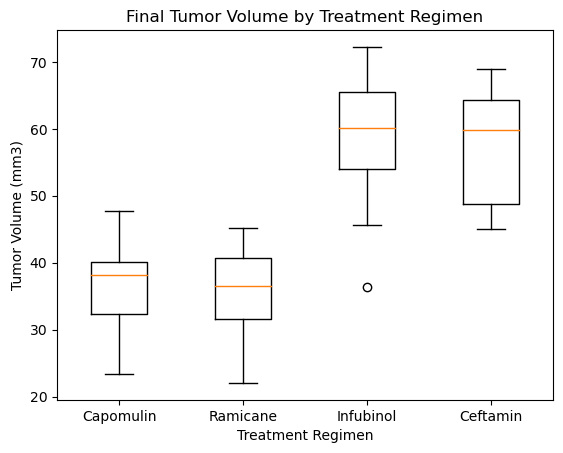

In [413]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(vol_list, labels=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.title("Final Tumor Volume by Treatment Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Treatment Regimen")

# Show plot
plt.show()

## Line and Scatter Plots

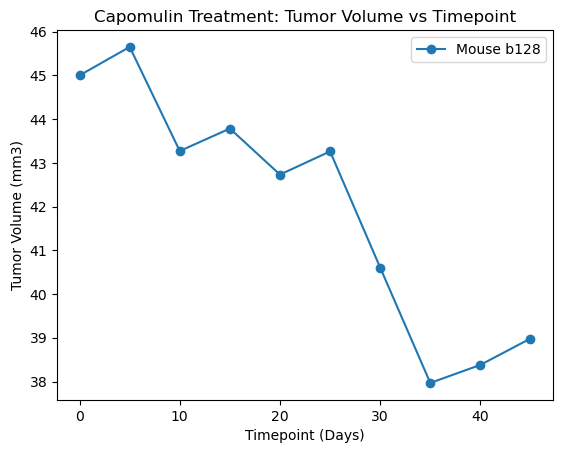

In [414]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
line_plot = capomulin_df.loc[capomulin_df["Mouse ID"] == "b128"]

# Extract data for the line plot
timepoints = line_plot["Timepoint"]
tumor_volume = line_plot["Tumor Volume (mm3)"]

# Generate the line plot
plt.plot(timepoints, tumor_volume, marker="o", label="Mouse b128")
plt.title("Capomulin Treatment: Tumor Volume vs Timepoint")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.legend()

# Show the plot
plt.show()


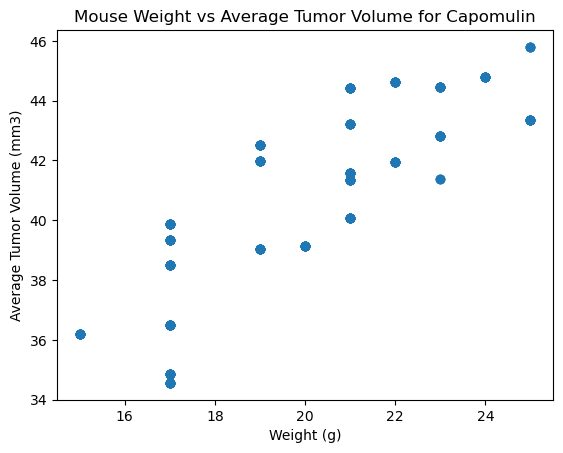

In [415]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Extract columns of interest from original data frame:
columns = clean_df[["Mouse ID","Drug Regimen","Weight (g)", "Tumor Volume (mm3)"]]

# Extract Capomulin data only:
capomulin_weight = columns[columns["Drug Regimen"] == "Capomulin"]

# Calculate tumor volume average for each mouse:
avg_tumor_volume = capomulin_weight.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# Reset index for new data:
avg_tumor_volume = avg_tumor_volume.reset_index()

# Merge data frame with mouse weight and data frame with avg tumor volume into a single dataset and sort by mouse ID:
merged_data = pd.merge(capomulin_weight, avg_tumor_volume, on="Mouse ID")

# Rename columns for clarity
merged_data = merged_data.rename(columns={"Tumor Volume (mm3)_x": "Tumor Volume (mm3)", 
                                          "Tumor Volume (mm3)_y": "Avg Tumor Volume (mm3)"})

# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
plt.scatter(merged_data["Weight (g)"], merged_data["Avg Tumor Volume (mm3)"])
plt.title("Mouse Weight vs Average Tumor Volume for Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()


## Correlation and Regression

The correlation coefficient between Mouse Weight and Tumor Volume for Capomulin is 0.83


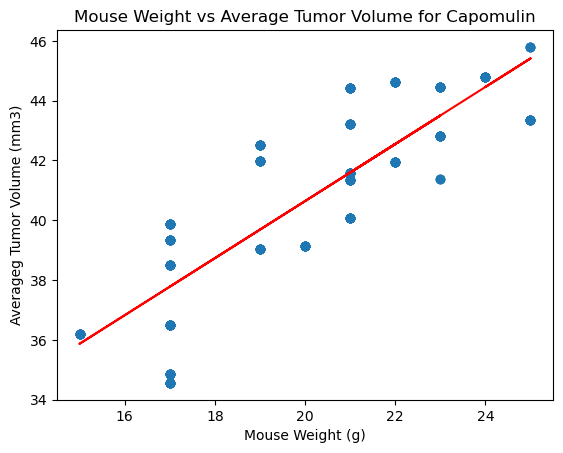

In [416]:
#Calculate the correlation coefficient
correlation_coefficient, _ = st.pearsonr(merged_data["Weight (g)"], merged_data["Avg Tumor Volume (mm3)"])
print(f"The correlation coefficient between Mouse Weight and Tumor Volume for Capomulin is {round(correlation_coefficient, 2)}")

# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
plt.scatter(merged_data["Weight (g)"], merged_data["Avg Tumor Volume (mm3)"])
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Averageg Tumor Volume (mm3)")
plt.title("Mouse Weight vs Average Tumor Volume for Capomulin")

# Add the linear regression equation and line to plot:
x_values=mouse_avg_t_vol_weight_df["Weight (g)"]
y_values=mouse_avg_t_vol_weight_df["Avg Tumor Volume (mm3)"]
(slope, intercept,  rvalue, pvalue, stderr)=linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values, "red")

plt.show()